
Premise:

You are working for a law firm as a data consultant. Your law firm has a group of financial law experts who analyze legal documents from all around the world and mark them as either relevant to financial law or not. Every document that is relevant to financial law must be shown to the relevant clients within **72 working hours**. In previous years, the financial law experts could keep up with the volume of documents. However, the volume has increased by 10x due to increased regulations from governments around the world due to different economic issues and it will be too costly for the company to hire 10x the number of financial legal experts. You were brought in as a data consultant to help them out by automating some/all parts of the analysis.

In [3]:
## Basic Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
os.listdir('/kaggle/input/ai-engineering-phase-1-datasets')


['regulations.csv', 'relevance_data.csv']

In [5]:
RelevanceData = pd.read_csv('/kaggle/input/ai-engineering-phase-1-datasets/relevance_data.csv')
RegulationsData = pd.read_csv('/kaggle/input/ai-engineering-phase-1-datasets/regulations.csv')


In [6]:
RegulationsData.shape

(134083, 8)

In [7]:
RegulationsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134083 entries, 0 to 134082
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Title            133687 non-null  object
 1   RegulatorId      134083 non-null  object
 2   SourceLanguage   134083 non-null  object
 3   DocumentTypeId   134083 non-null  object
 4   PublicationDate  134083 non-null  object
 5   IsPdf            134083 non-null  bool  
 6   Content          133480 non-null  object
 7   DocumentID       134083 non-null  object
dtypes: bool(1), object(7)
memory usage: 7.3+ MB


In [8]:
RegulationsData.isnull().sum()

Title              396
RegulatorId          0
SourceLanguage       0
DocumentTypeId       0
PublicationDate      0
IsPdf                0
Content            603
DocumentID           0
dtype: int64

In [9]:
def unique_regulations():

  """
  This function iterates through each row and determines the number of unique values in each column
  """

  for col in RegulationsData.columns:
    A = len(RegulationsData[col].unique())
    print(f"{col}: {A}")

unique_regulations()


Title: 81407
RegulatorId: 868
SourceLanguage: 124
DocumentTypeId: 117
PublicationDate: 39546
IsPdf: 2
Content: 93570
DocumentID: 97584


In [10]:
## Drop rows with missing values
RegulationsData = RegulationsData.dropna()

## Drop PublicationDate Column
#RegulationsData.drop("PublicationDate", axis=1, inplace=True)
#RelevanceData.drop(["RequirementSource", "User"], axis=1, inplace=True)



In [11]:
for column in RegulationsData.columns:
  print(f"{column}: {RegulationsData[column].nunique()}")

Title: 81244
RegulatorId: 866
SourceLanguage: 117
DocumentTypeId: 117
PublicationDate: 39372
IsPdf: 2
Content: 93567
DocumentID: 96978


In [12]:
RelevanceData.head(5)

,RequirementSource,ContainsRelevantRegulation,User,DocumentID
0,Regulation,True,00002B53,99f7-77d9-4c72-a45a-049dd24b
1,Regulation,False,00002B53,104e-8d13-4537-8e56-415dacd8
2,Regulation,False,0000164E,b634-3641-4f16-96cc-99e1cb85
3,Guidance,False,000006A5,f452-1e80-482e-ab6b-86d02faf
4,Guidance,False,000006A5,4449-7753-44ab-a7cd-0559f4ab


<Axes: xlabel='RequirementSource', ylabel='count'>

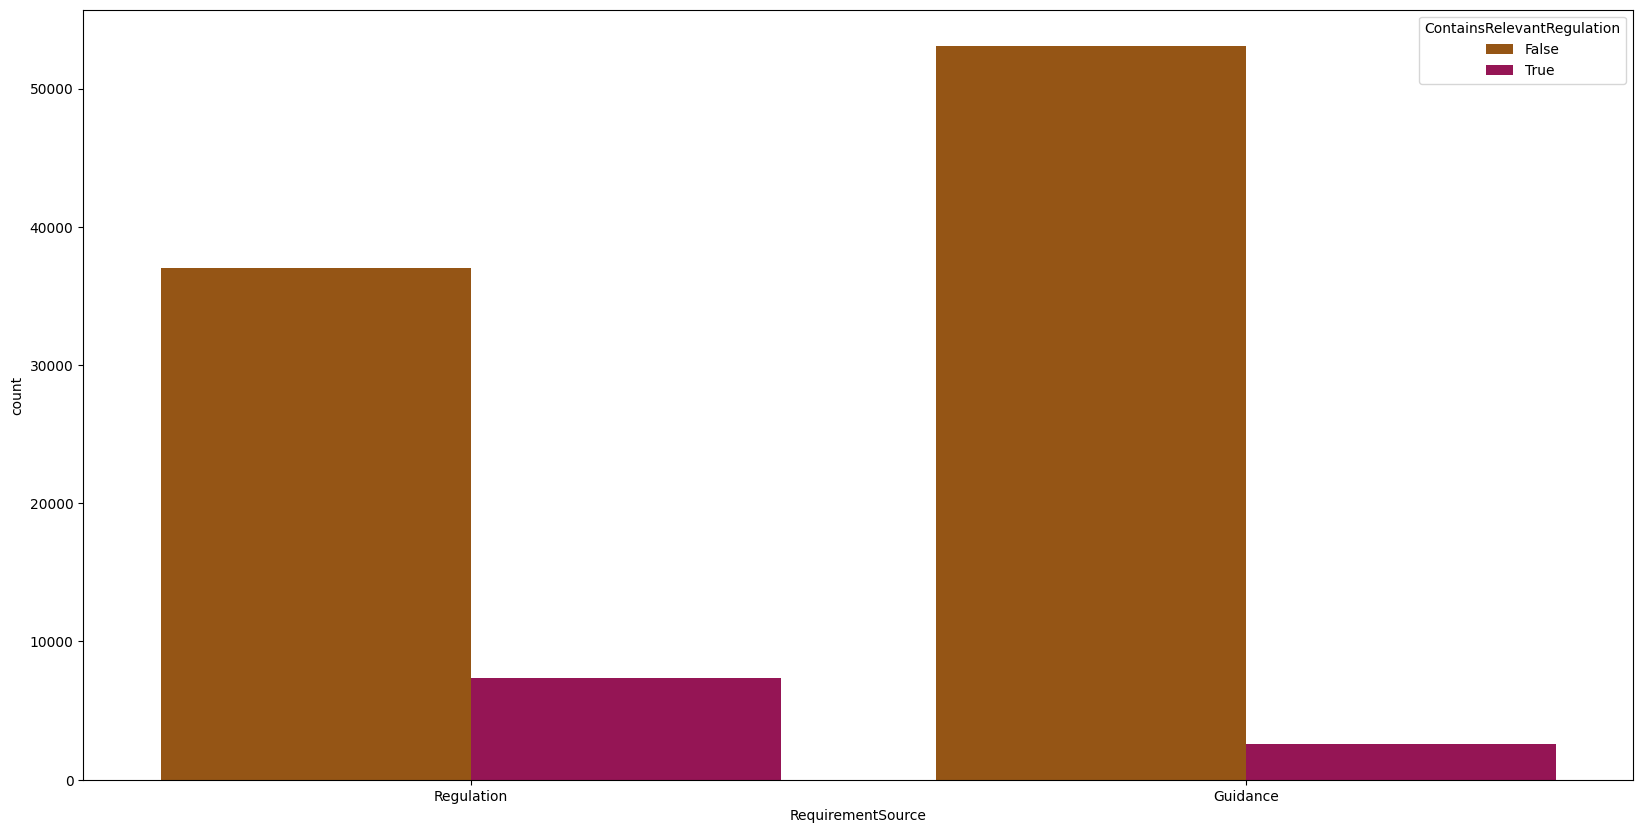

In [13]:
plt.figure(figsize=(20, 10))

sns.countplot(x = "RequirementSource", hue = "ContainsRelevantRegulation", data = RelevanceData, palette = "brg_r")



In [14]:
RelevanceData.shape

(100000, 4)

In [15]:
RelevanceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   RequirementSource           100000 non-null  object
 1   ContainsRelevantRegulation  100000 non-null  bool  
 2   User                        100000 non-null  object
 3   DocumentID                  100000 non-null  object
dtypes: bool(1), object(3)
memory usage: 2.4+ MB


In [16]:
RelevanceData.isnull().sum()

RequirementSource             0
ContainsRelevantRegulation    0
User                          0
DocumentID                    0
dtype: int64

In [17]:
## Drop duplicate values
RegulationsData = RegulationsData.drop_duplicates(keep='first')
RelevanceData = RelevanceData.drop_duplicates(keep='first')

In [18]:
# Identify rows with common regulations in both datasets
common_regulations = RegulationsData[RegulationsData['DocumentID'].isin(RelevanceData['DocumentID'])]

In [19]:
common_regulations.columns

Index(['Title', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId',
       'PublicationDate', 'IsPdf', 'Content', 'DocumentID'],
      dtype='object')

In [20]:
common_regulations.shape

(77243, 8)

In [21]:
common_regulations.head(5)

,Title,RegulatorId,SourceLanguage,DocumentTypeId,PublicationDate,IsPdf,Content,DocumentID
0,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2
1,Readout of Vice President Harris’s Call with Y...,d47a-5966-4cac-802f-00b7cf36,English,9e76-0039-4827-a596-e841437e,2024-08-02 00:01:00.003000+00:00,False,"<time>August 01, 2024</time><div> <div> <p>Vic...",4b15-5b76-4828-b3b3-f3a58402
2,NOTE # 13.344 01 August 2024 The Agents are in...,749f-7ebf-4d0f-8ed9-dc645d9b,Spanish,f6e0-d6b3-471f-9811-dce56652,2024-08-02 05:51:00+00:00,True,NOTE # 13.344 01 August 2024 The Agents are in...,a6ec-8a09-443d-b28f-34763ca6
15,Resolution BCB No 404 of 1/8/2024,87ea-8d18-4bdb-8226-74d515db,Portuguese,e2c0-5098-40df-824b-62779360,2024-08-02 00:11:00.003000+00:00,False,<div> RESOLUTION BCB NO 404 OF 1 AUGUST 2024 <...,ff57-58d2-4db2-8b5e-4b321b73
16,"SENATE: WITH AMENDMENTS, THERE WAS OPINION TO ...",cfd5-f561-4a3b-ac10-32891147,Spanish,9e76-0039-4827-a596-e841437e,2024-08-02 05:21:00.003000+00:00,False,"<div> August 1, 2024 </div> <br> <div><p>Chang...",4af2-d0f5-465c-a166-1338695c


Merging the Regulations Dataset and the Relevance Dataset

- EDA will be done on this merged dataset to get relevant information that will be used to determine the label for what we are to predict

In [22]:
import pandas as pd

merged_df = pd.merge(RegulationsData, RelevanceData, on='DocumentID', how='inner')

merged_df = pd.DataFrame(merged_df)

merged_df.head(10)


,Title,RegulatorId,SourceLanguage,DocumentTypeId,PublicationDate,IsPdf,Content,DocumentID,RequirementSource,ContainsRelevantRegulation,User
0,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2,Regulation,False,00000B75
1,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2,Guidance,False,00000B75
2,Readout of Vice President Harris’s Call with Y...,d47a-5966-4cac-802f-00b7cf36,English,9e76-0039-4827-a596-e841437e,2024-08-02 00:01:00.003000+00:00,False,"<time>August 01, 2024</time><div> <div> <p>Vic...",4b15-5b76-4828-b3b3-f3a58402,Guidance,False,00003102
3,NOTE # 13.344 01 August 2024 The Agents are in...,749f-7ebf-4d0f-8ed9-dc645d9b,Spanish,f6e0-d6b3-471f-9811-dce56652,2024-08-02 05:51:00+00:00,True,NOTE # 13.344 01 August 2024 The Agents are in...,a6ec-8a09-443d-b28f-34763ca6,Guidance,False,00000E6A
4,Resolution BCB No 404 of 1/8/2024,87ea-8d18-4bdb-8226-74d515db,Portuguese,e2c0-5098-40df-824b-62779360,2024-08-02 00:11:00.003000+00:00,False,<div> RESOLUTION BCB NO 404 OF 1 AUGUST 2024 <...,ff57-58d2-4db2-8b5e-4b321b73,Guidance,True,0000095C
5,"SENATE: WITH AMENDMENTS, THERE WAS OPINION TO ...",cfd5-f561-4a3b-ac10-32891147,Spanish,9e76-0039-4827-a596-e841437e,2024-08-02 05:21:00.003000+00:00,False,"<div> August 1, 2024 </div> <br> <div><p>Chang...",4af2-d0f5-465c-a166-1338695c,Guidance,False,00000E6A
6,On approval of the minimum amount of expenses ...,591c-e7a9-4783-a908-6ed20f4b,Russian,dc3a-5f62-4f46-b14f-8617166b,2024-08-02 11:31:00.006000+00:00,False,Current version from 31.07.2024.<div><div>In a...,41aa-740c-42fc-97d3-c8e2450e,Guidance,False,8EB9D6ED
7,On approval of the minimum amount of expenses ...,591c-e7a9-4783-a908-6ed20f4b,Russian,dc3a-5f62-4f46-b14f-8617166b,2024-08-02 11:31:00.006000+00:00,False,Current version from 31.07.2024.<div><div>In a...,41aa-740c-42fc-97d3-c8e2450e,Regulation,True,8EB9D6ED
8,Tax administration continued to enhance the ta...,4769-7d4a-47ec-8fc3-f22d1c38,Vietnamese,8587-12b2-42fc-a196-646413cb,2024-08-02 02:51:00.016000+00:00,False,"<div> <div> </div> <div></div> <!--div class=""...",03f4-0785-47be-b174-a9dcae39,Guidance,False,00002F30
9,Statistics,cf15-a3f1-4963-ac62-f99febdc,English,4034-6185-4d93-b653-b923b1e0,2024-08-02 10:31:00+00:00,False,<p>FINRA is responsible for regulating every b...,3ced-dc24-4142-88e5-61cbb189,Guidance,False,00003102


In [23]:
merged_df.shape

(98763, 11)

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98763 entries, 0 to 98762
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       98763 non-null  object
 1   RegulatorId                 98763 non-null  object
 2   SourceLanguage              98763 non-null  object
 3   DocumentTypeId              98763 non-null  object
 4   PublicationDate             98763 non-null  object
 5   IsPdf                       98763 non-null  bool  
 6   Content                     98763 non-null  object
 7   DocumentID                  98763 non-null  object
 8   RequirementSource           98763 non-null  object
 9   ContainsRelevantRegulation  98763 non-null  bool  
 10  User                        98763 non-null  object
dtypes: bool(2), object(9)
memory usage: 7.0+ MB


SourceLanguages with less than 5% of the total true labels: ['Arabic', 'Bengali', 'Bulgarian', 'Chinese', 'Chinese (simplified)', 'Chinese (traditional', 'Czech', 'Danish', 'Finnish', 'Flemish', 'French', 'Galician', 'German', 'Greek', 'Hindi', 'Hungarian', 'Ido', 'Indonesian', 'Interlingua (Interna', 'Italian', 'Japanese', 'Kazakh', 'Latvian', 'Malay (individual la', 'Mandarin Chinese', 'Modern Greek (1453-)', 'Norwegian Bokmål', 'Papiamento', 'Polish', 'Portuguese', 'Slovak', 'Spanish; Castilian', 'Standard Arabic', 'Swedish', 'Tedim Chin', 'Thai', 'Turkish', 'Upper Guinea Crioulo', 'Vietnamese']
Number of SourceLanguages with less than 5% of the total true labels: 39


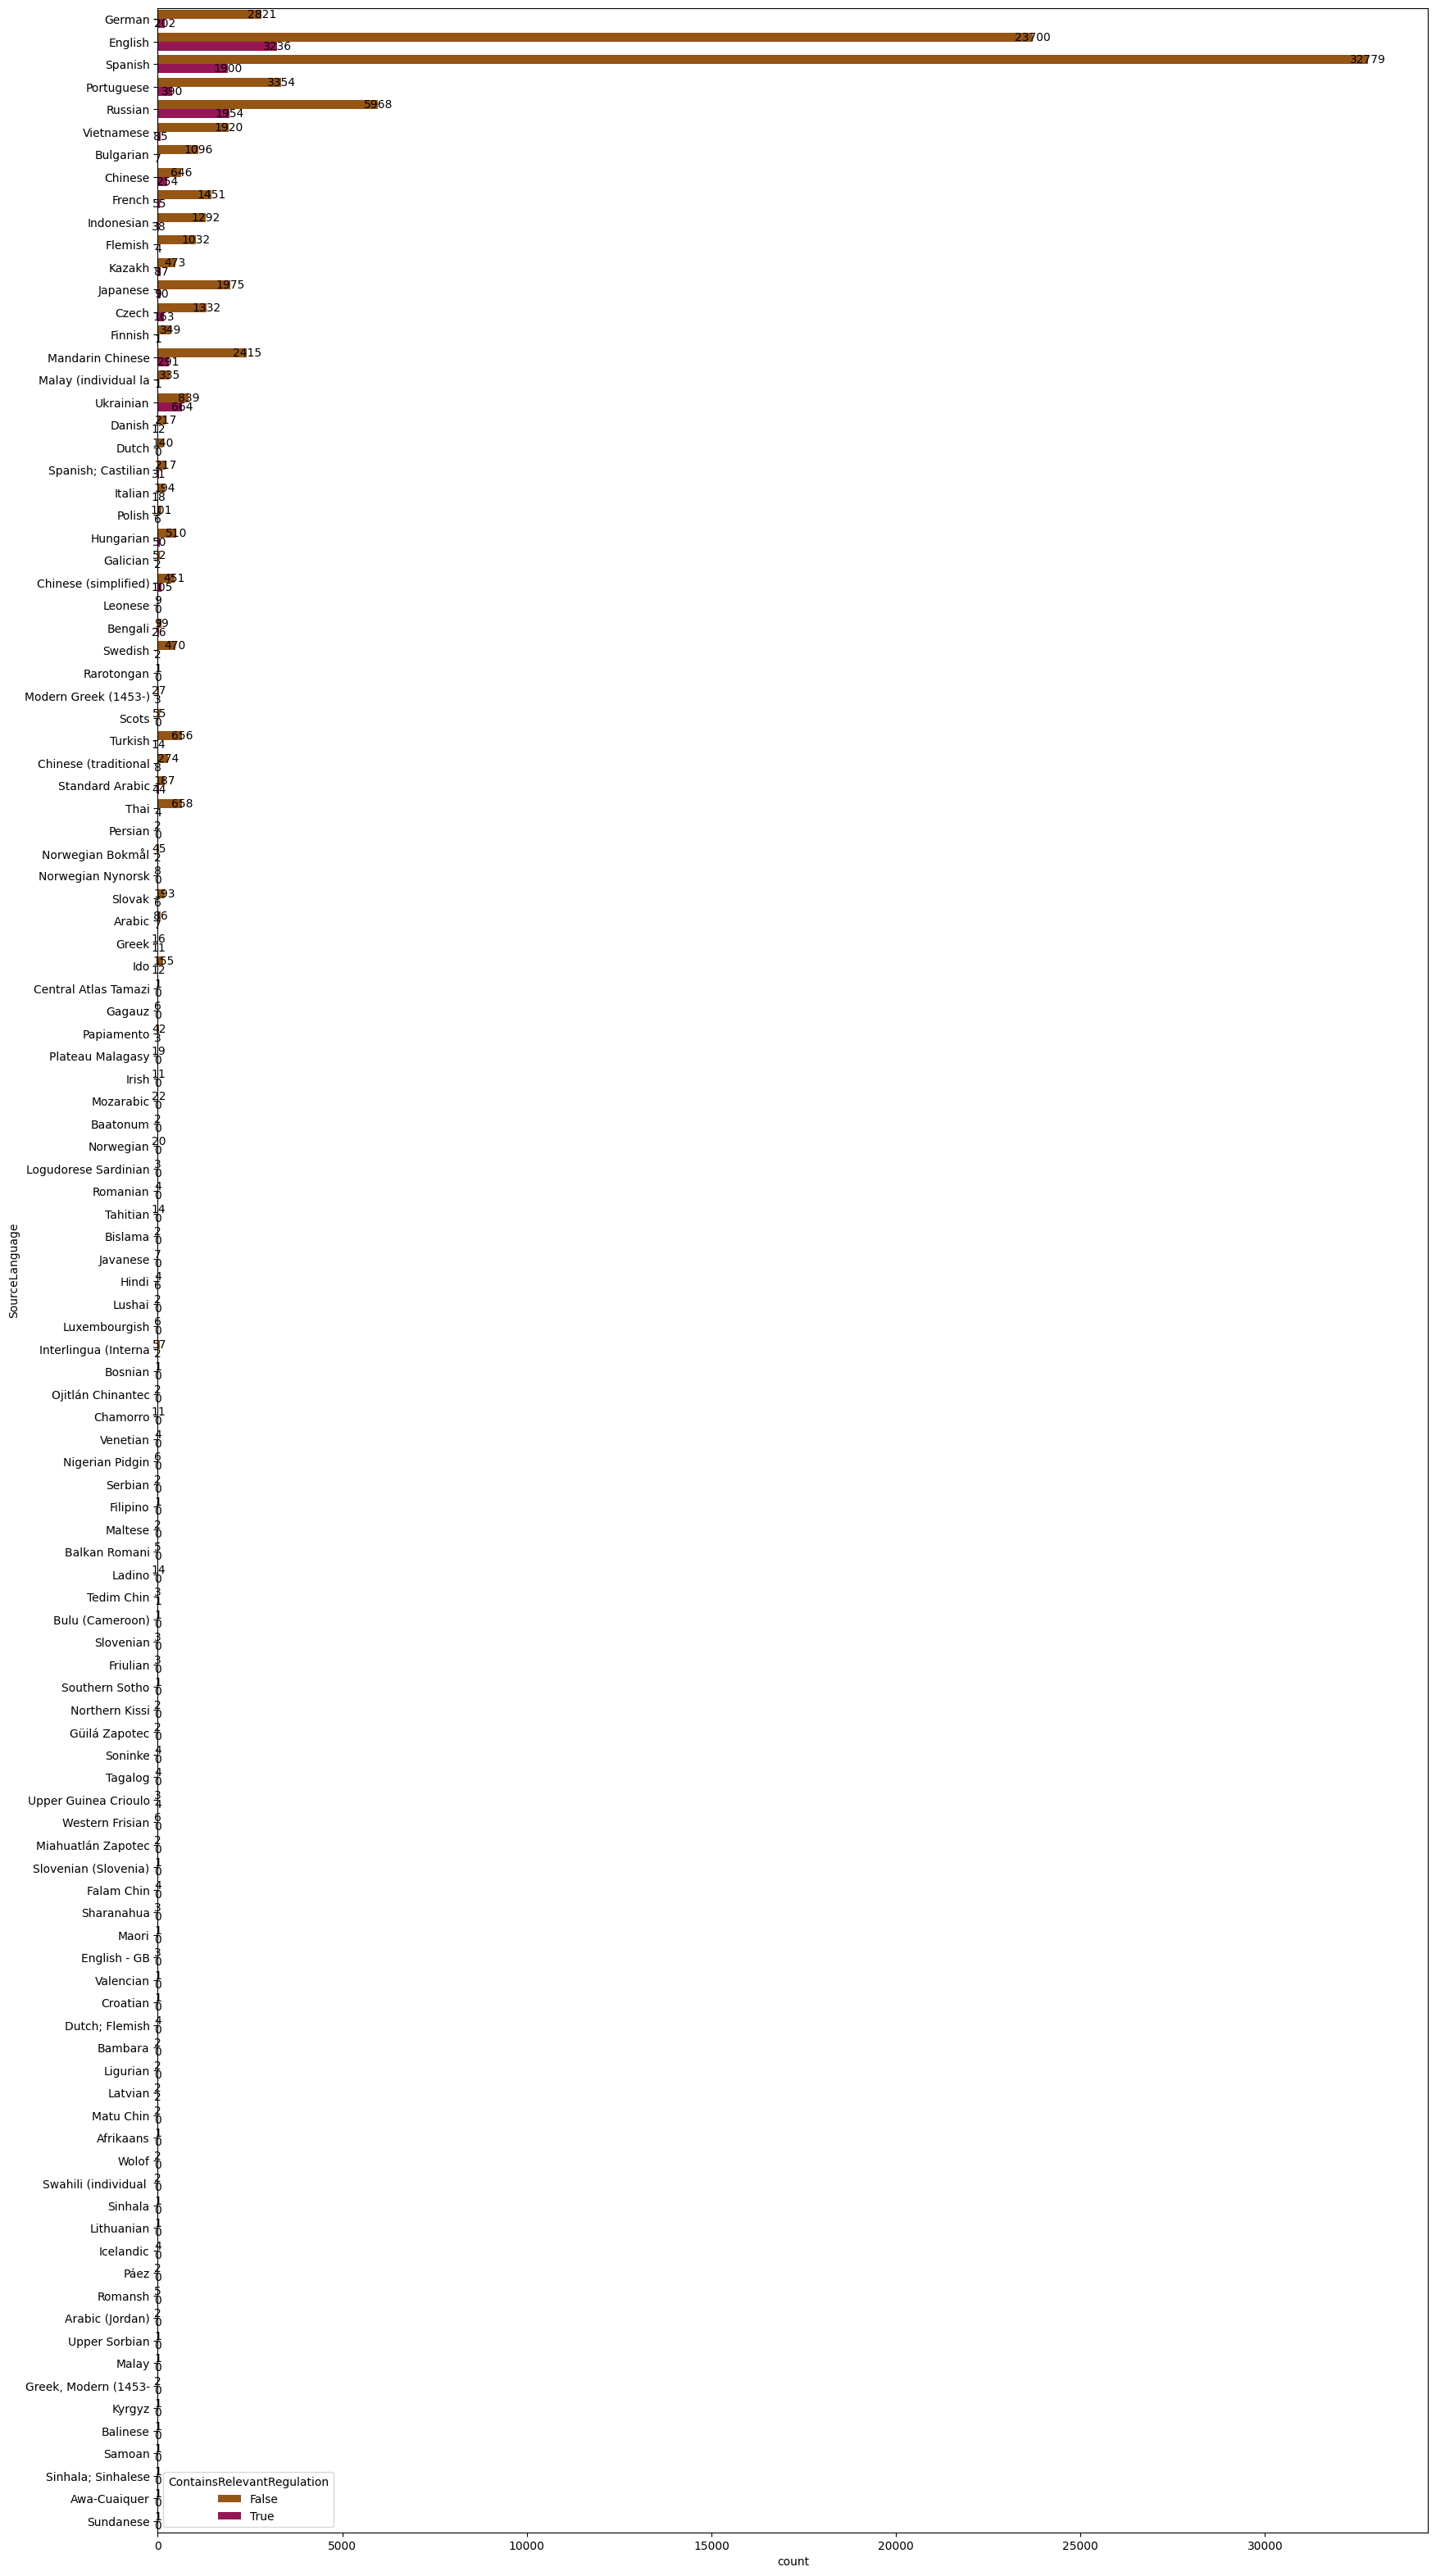

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame with columns 'SourceLanguage' and 'ContainsRelevantRegulation'

# Calculate the total number of true labels
total_true_labels = merged_df[merged_df["ContainsRelevantRegulation"] == True].shape[0]

# Calculate the number of true labels per SourceLanguage
true_label_counts = merged_df[merged_df["ContainsRelevantRegulation"] == True].groupby("SourceLanguage").size()

# Identify SourceLanguages with less than 5% of the total true labels
threshold = 0.05 * total_true_labels
source_languages_less_than_5_percent = true_label_counts[true_label_counts < threshold].index.tolist()

# Print the result
print(f"SourceLanguages with less than 5% of the total true labels: {source_languages_less_than_5_percent}")
print(f"Number of SourceLanguages with less than 5% of the total true labels: {len(source_languages_less_than_5_percent)}")

# Visualization
plt.figure(figsize=(20, 40))
ax = sns.countplot(y="SourceLanguage", hue="ContainsRelevantRegulation", data=merged_df, palette="brg_r")

# Annotate the bars with the count values
for p in ax.patches:
    width = p.get_width()  # Get the width of each bar
    ax.text(width + 0.2,    # Position the text slightly off the bar
            p.get_y() + p.get_height() / 2,  # Center the text vertically on the bar
            int(width),  # Convert count to integer and display it
            ha="center", va="center")  # Center alignment

plt.show()


Top 6 SourceLanguages according to the true labels:
SourceLanguage
English             3236
Russian             1954
Spanish             1900
Ukrainian            664
Portuguese           390
Mandarin Chinese     291
dtype: int64
Percentage of each SourceLanguage in the top 6:
SourceLanguage
English             33.010303
Russian             19.932674
Spanish             19.381822
Ukrainian            6.773437
Portuguese           3.978374
Mandarin Chinese     2.968479
dtype: float64


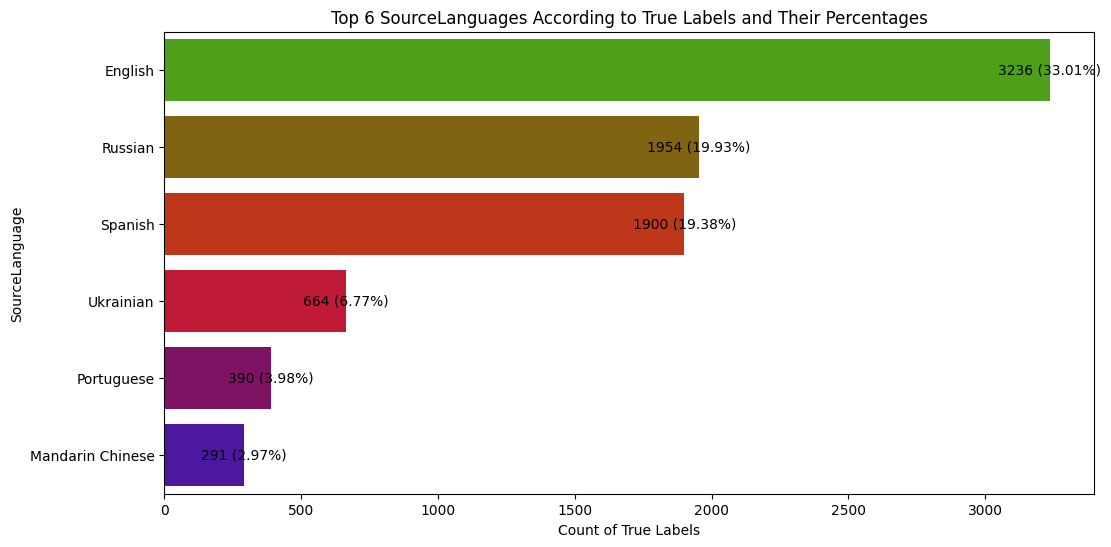

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame with columns 'SourceLanguage' and 'ContainsRelevantRegulation'

# Filter for rows where ContainsRelevantRegulation is True
true_labels_df = merged_df[merged_df['ContainsRelevantRegulation'] == True]

# Calculate the number of true labels per SourceLanguage
true_label_counts = true_labels_df.groupby("SourceLanguage").size()

# Sort and select the top 6 SourceLanguages
top_6_source_languages = true_label_counts.sort_values(ascending=False).head(6)

# Calculate the percentage of each SourceLanguage
total_true_labels = true_labels_df.shape[0]
top_6_percentages = (top_6_source_languages / total_true_labels) * 100

# Print the result
print(f"Top 6 SourceLanguages according to the true labels:\n{top_6_source_languages}")
print(f"Percentage of each SourceLanguage in the top 6:\n{top_6_percentages}")

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=top_6_source_languages.index, x=top_6_source_languages.values, palette="brg_r")

# Annotate the bars with the count values and percentages
for p, percentage in zip(ax.patches, top_6_percentages):
    width = p.get_width()  # Get the width of each bar
    ax.text(width + 0.2,    # Position the text slightly off the bar
            p.get_y() + p.get_height() / 2,  # Center the text vertically on the bar
            f'{int(width)} ({percentage:.2f}%)',  # Display count and percentage
            ha="center", va="center")  # Center alignment

plt.xlabel("Count of True Labels")
plt.ylabel("SourceLanguage")
plt.title("Top 6 SourceLanguages According to True Labels and Their Percentages")
plt.show()


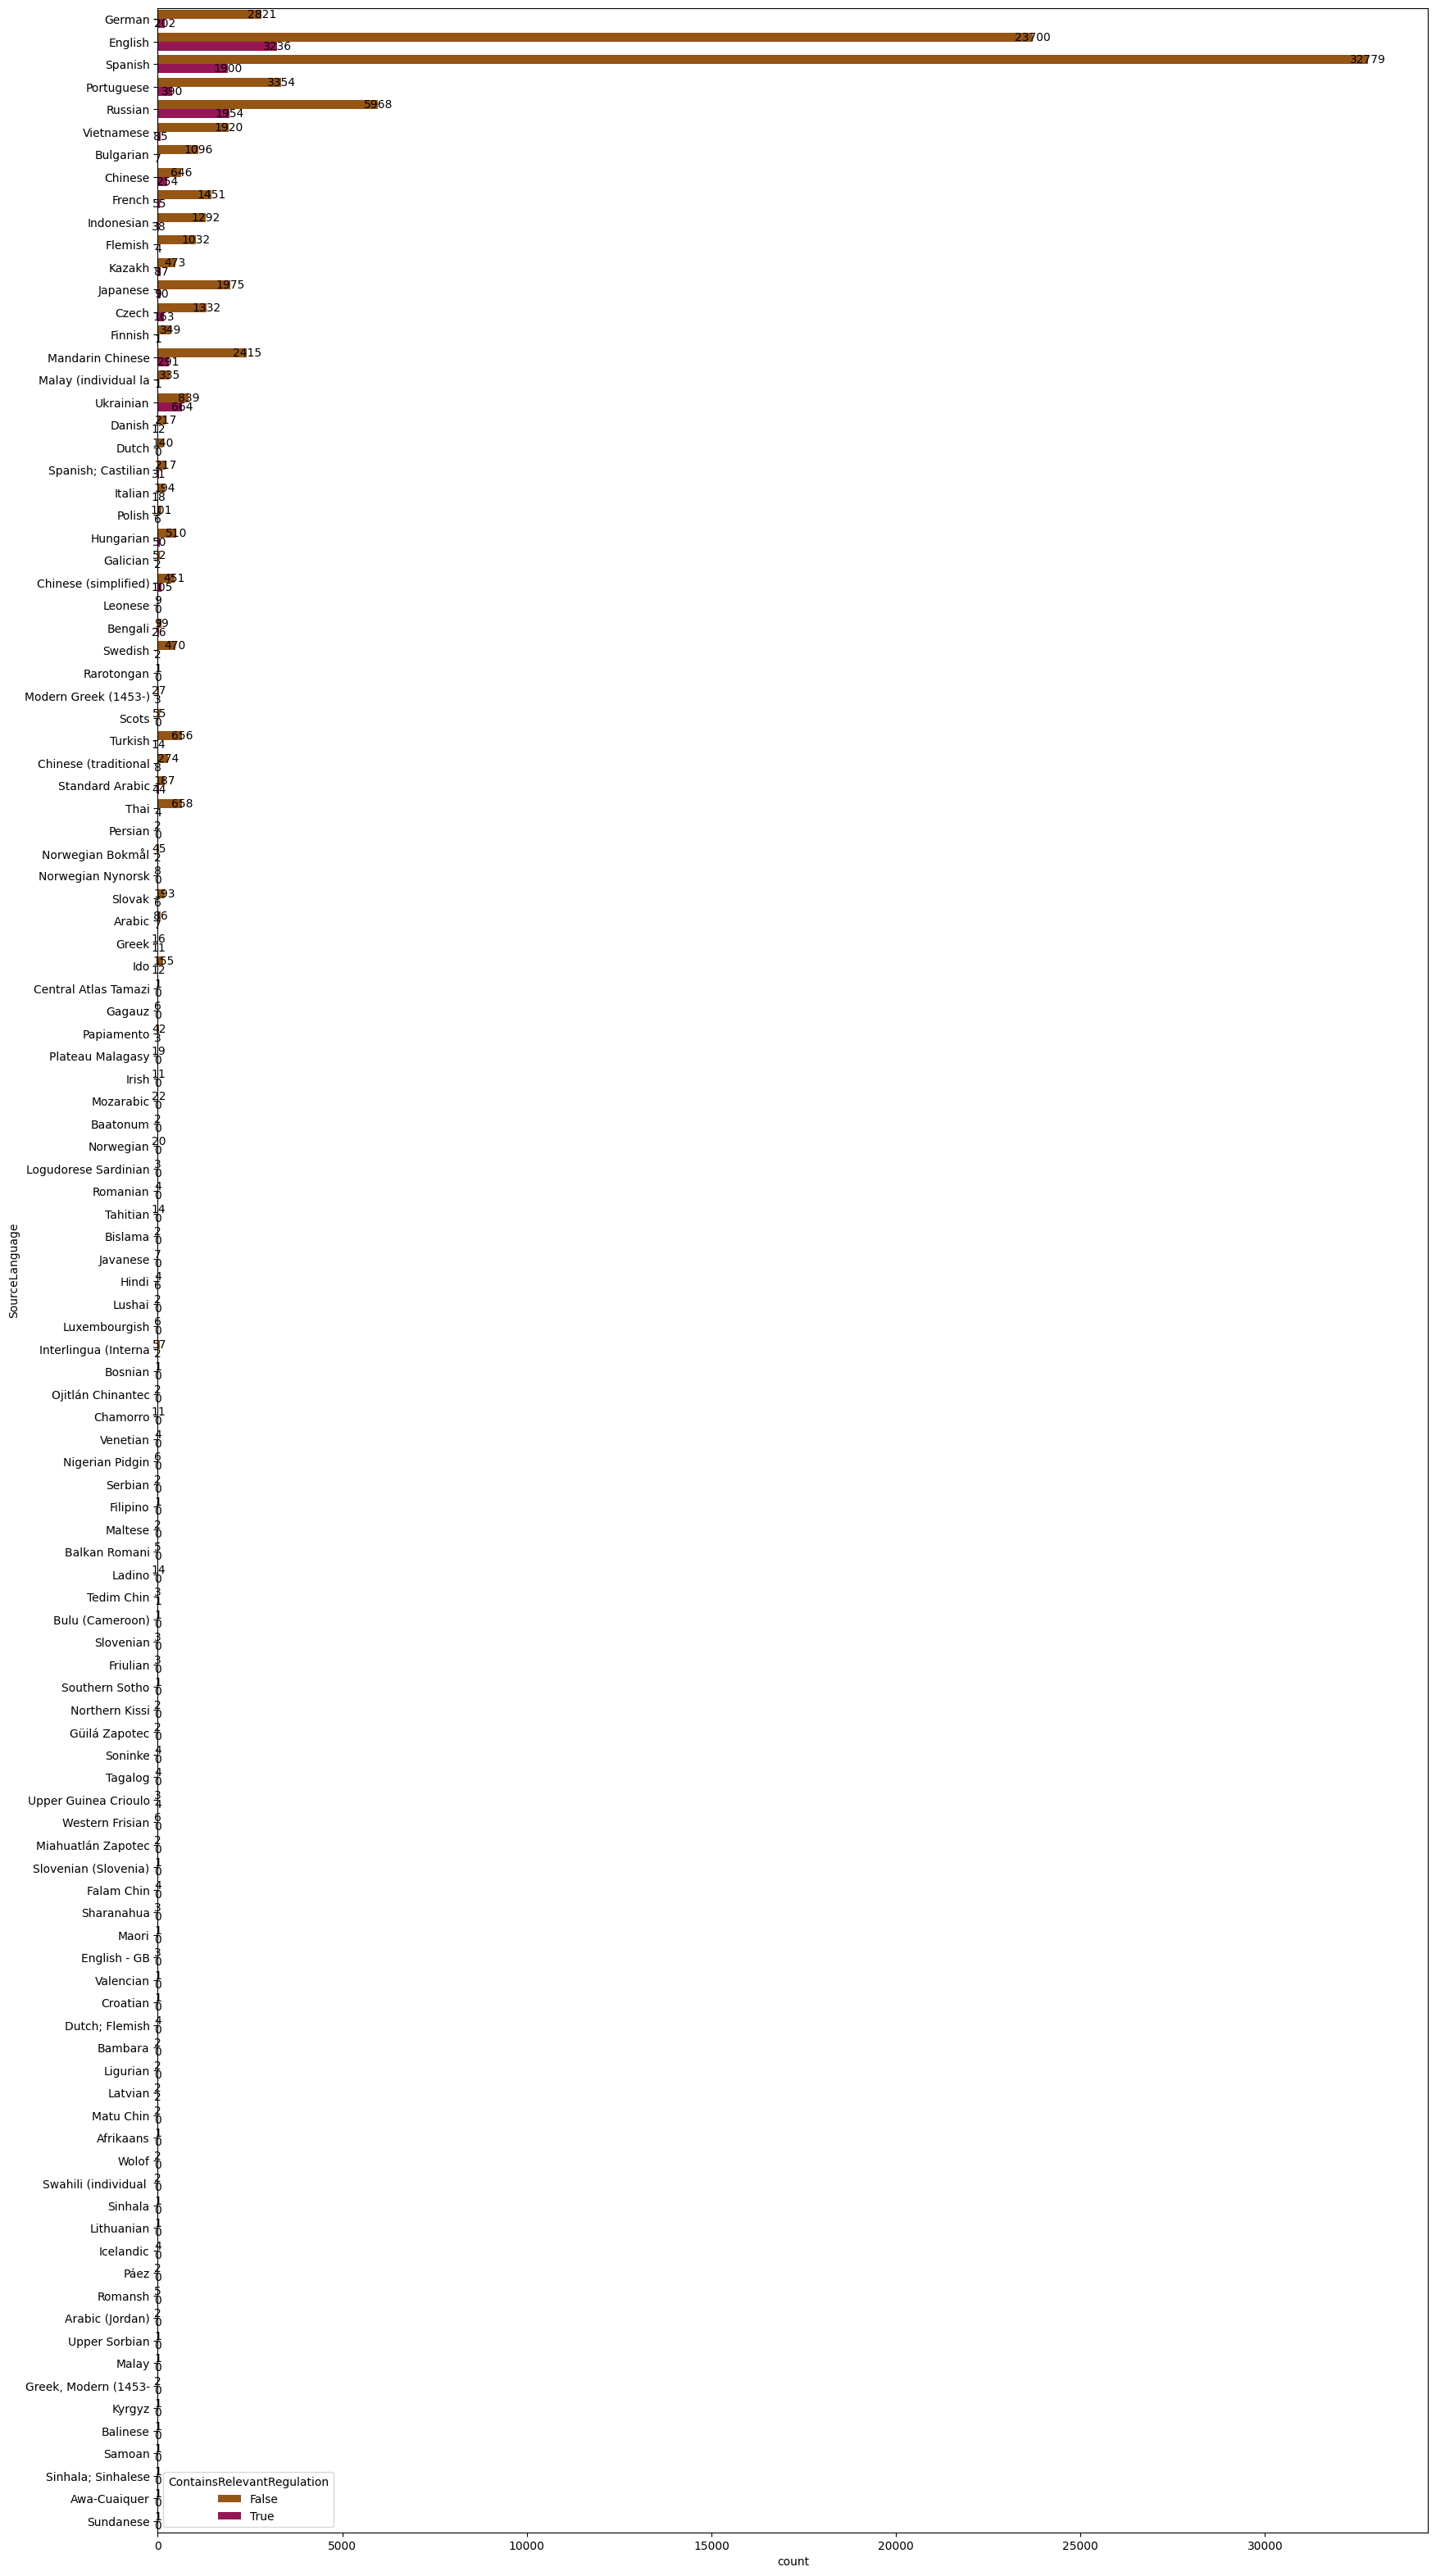

In [27]:
plt.figure(figsize=(20, 40))
ax = sns.countplot(y="SourceLanguage", hue="ContainsRelevantRegulation", data=merged_df, palette="brg_r")

# Annotate the bars with the count values
for p in ax.patches:
    width = p.get_width()  # Get the width of each bar
    ax.text(width + 0.2,    # Position the text slightly off the bar
            p.get_y() + p.get_height() / 2,  # Center the text vertically on the bar
            int(width),  # Convert count to integer and display it
            ha="center", va="center")  # Center alignment

plt.show()


Spanish {32779}, English {23700}, and Russian {5968} have the highest volume of documents delivered (in descending order), while English {3236}, Spanish {1900} and Russian {1954} have the highest volume of true documents that are relevant (in descending order).

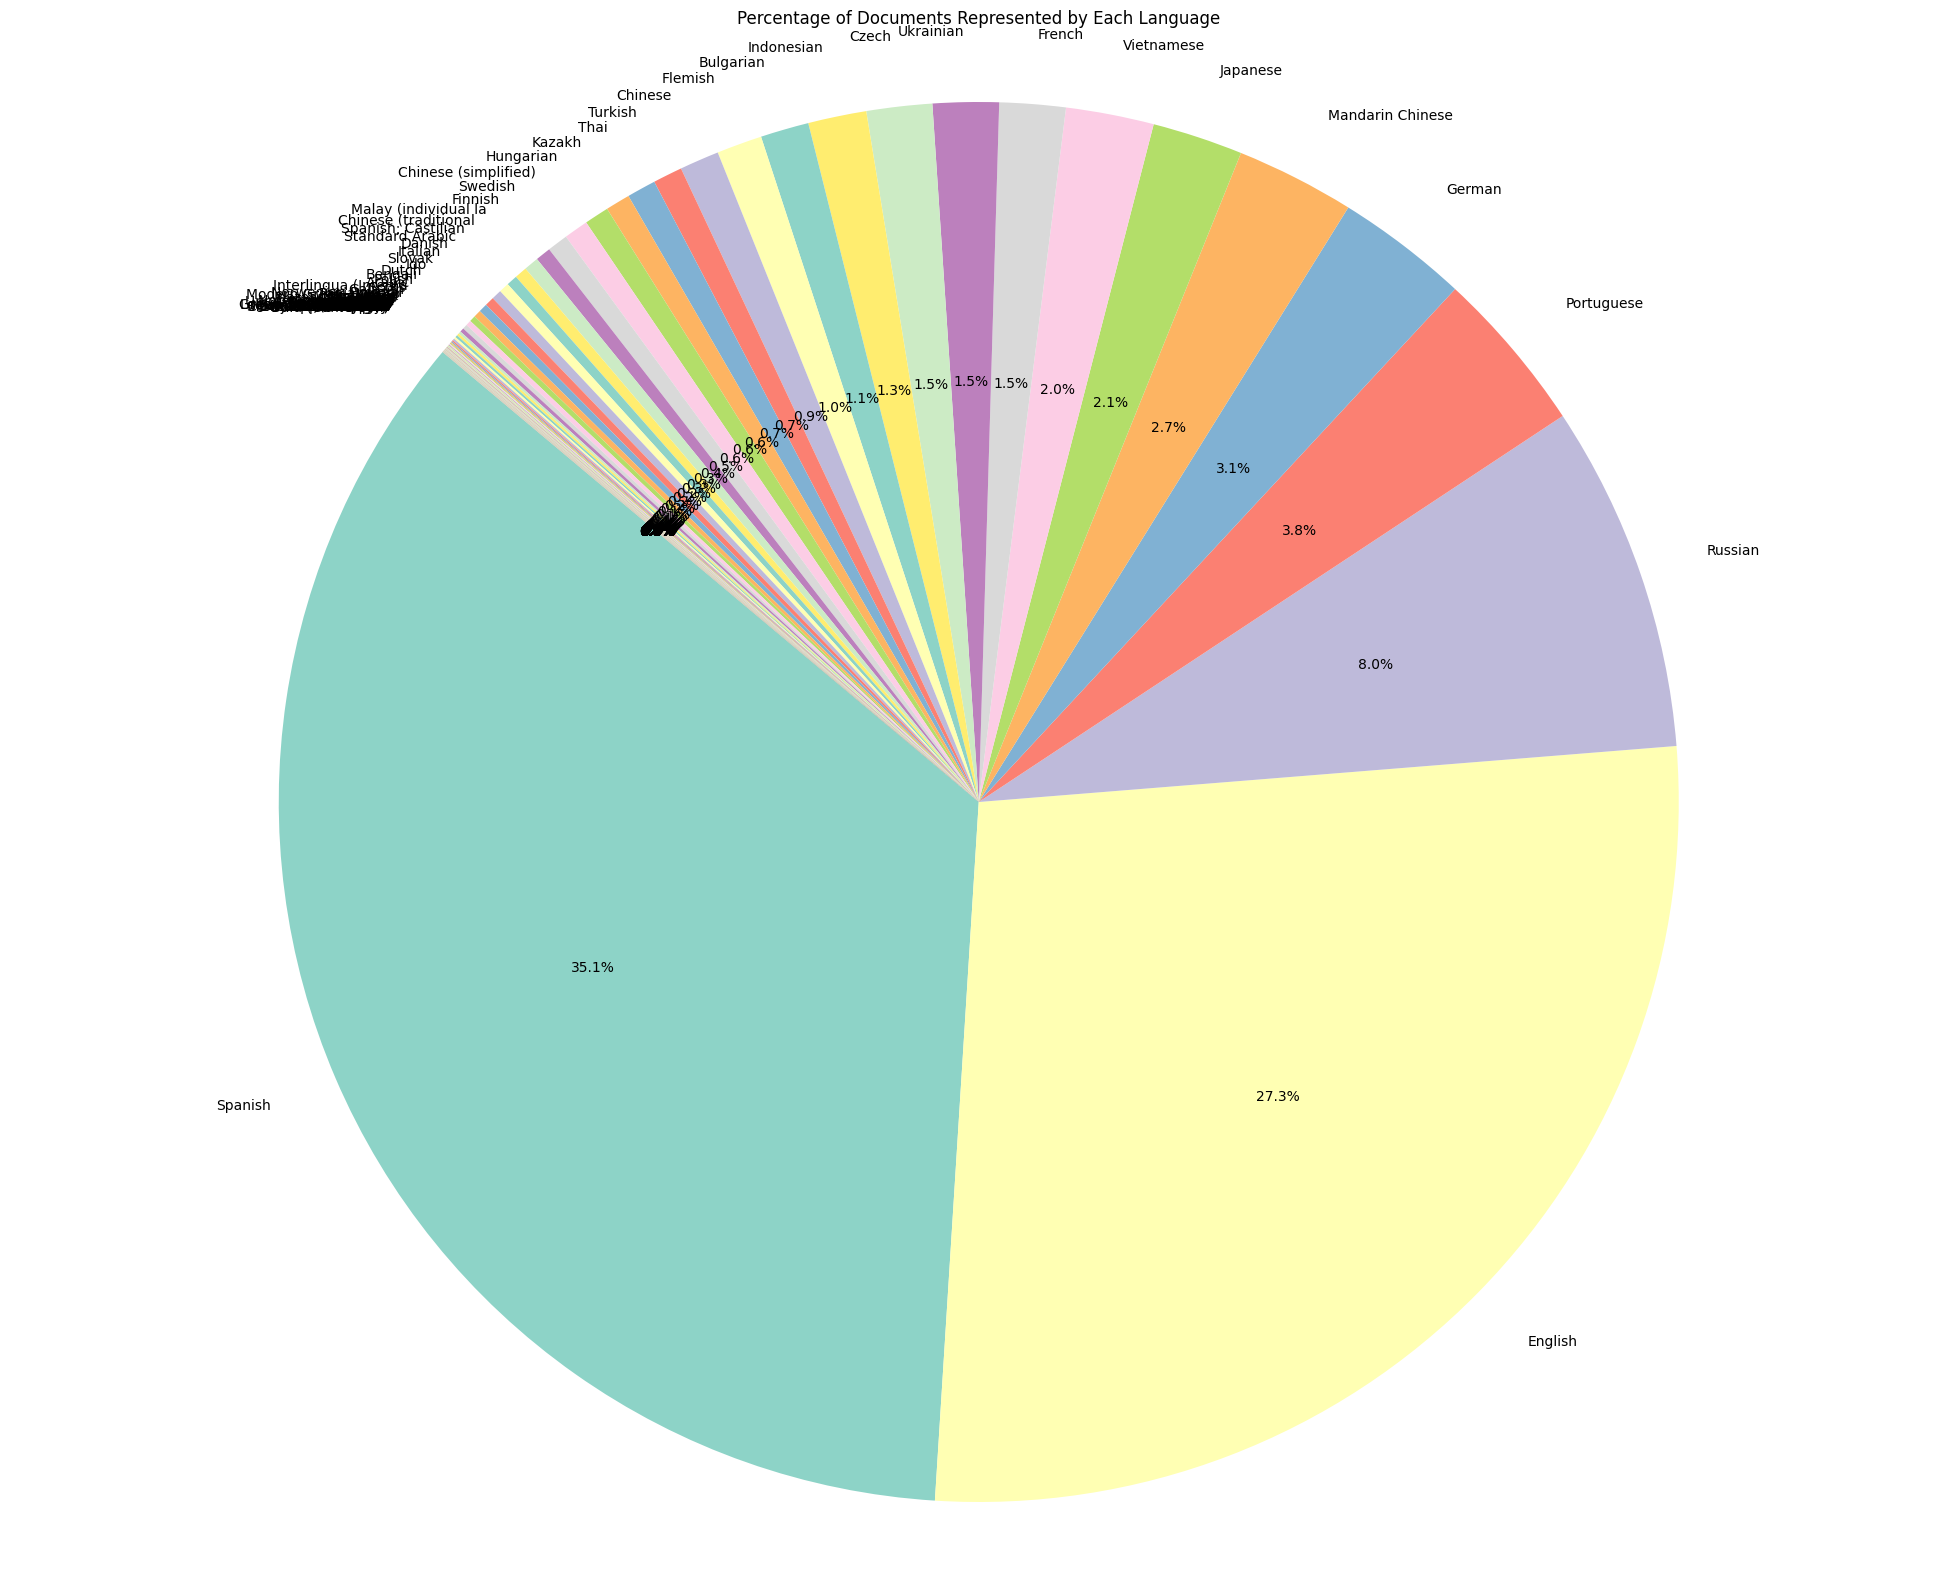

In [28]:
# Calculate the percentage of each category
category_counts = merged_df['SourceLanguage'].value_counts()
category_labels = category_counts.index
category_sizes = category_counts.values

# Create a pie chart
plt.figure(figsize=(25, 20))
plt.pie(category_sizes, labels=category_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.title('Percentage of Documents Represented by Each Language')
plt.show()


In [29]:
#Percentage of each of the three highest languages in the total documents
Highest_Ocuuring_Lang = {'Spanish' : 35.1, 'English' : 27.3, 'Russian' : 8.0}

Total = Highest_Ocuuring_Lang['Spanish'] + Highest_Ocuuring_Lang['English'] + Highest_Ocuuring_Lang['Russian']

print(Total)

70.4


This shows that Spanish, English and Russian documents form a total of over 70% of all the documents

In [30]:
#Percentage of each of the three most relevant languages
Top_Rel_Lang = {'Spanish_Rel' : 1900, 'English_Rel' : 3236, 'Russian_Rel' : 1954}

Total = Top_Rel_Lang['Spanish_Rel'] + Top_Rel_Lang['English_Rel'] + Top_Rel_Lang['Russian_Rel'] # Access dictionary values using keys

print (Total)

for i in Top_Rel_Lang:
  Top_Rel_Lang[i] = (Top_Rel_Lang[i] / Total) * 100

print(Top_Rel_Lang)


7090
{'Spanish_Rel': 26.79830747531735, 'English_Rel': 45.64174894217207, 'Russian_Rel': 27.559943582510577}


In [31]:
# import re
# from bs4 import BeautifulSoup

# def clean_text(text):
#     # Lowercase the text
#     text = text.lower()

#     # Remove HTML tags using BeautifulSoup
#     text = BeautifulSoup(text, "html.parser").get_text()

#     # Remove links (URLs)
#     text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

#     # Remove numbers
#     text = re.sub(r'\d+', '', text)

#     # Remove irregular characters (keeping only alphanumeric characters and basic punctuation)
#     text = re.sub(r'[^a-zA-Z\s.,!?\'-]', ' ', text)

#     return text

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import pandas as pd

# Preprocessing function (optional)
def clean_content(text):
    # Custom text cleaning, similar to your earlier clean_text function
    return text

# Apply cleaning
merged_df['Cleaned_Content'] = merged_df['Content'].apply(clean_content)

In [33]:
# patterns = {}  # Initialize patterns as a dictionary
# for language in merged_df['SourceLanguage'].unique():
#     language_content = merged_df[merged_df['SourceLanguage'] == language]['Cleaned_Content']
#     # Extracting bigrams/trigrams or using TF-IDF to identify patterns
#     vectorizer = TfidfVectorizer(ngram_range=(2, 3), min_df=2, max_df=0.8)
#     tfidf_matrix = vectorizer.fit_transform(language_content)
#     feature_names = vectorizer.get_feature_names_out()

    
#     # Get top patterns (or use another metric for selection)
#     common_patterns = Counter(feature_names).most_common(10)  # Adjust based on your criteria
#     patterns[language] = [pattern for pattern, _ in common_patterns] # Now you can assign values to 'patterns'

In [34]:
# # Create a new column with matched patterns
# def pattern_match(row):
#     language = row['SourceLanguage']
#     content = row['Cleaned_Content']
#     if language in patterns:
#         for pattern in patterns[language]:
#             if pattern in content:
#                 return 1  # Pattern found
#     return 0  # No pattern found

In [35]:
# merged_df['PatternMatch'] = merged_df.apply(pattern_match, axis=1)

# # Concatenate the new column with SourceLanguage
# merged_df['SourceLanguage_Pattern'] = merged_df['SourceLanguage'] + '_' + merged_df['PatternMatch'].astype(str)

In [36]:
merged_df.head(5)

,Title,RegulatorId,SourceLanguage,DocumentTypeId,PublicationDate,IsPdf,Content,DocumentID,RequirementSource,ContainsRelevantRegulation,User,Cleaned_Content
0,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2,Regulation,False,00000B75,Federal Gazette Part I 2024 Issued to Bonn on ...
1,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2,Guidance,False,00000B75,Federal Gazette Part I 2024 Issued to Bonn on ...
2,Readout of Vice President Harris’s Call with Y...,d47a-5966-4cac-802f-00b7cf36,English,9e76-0039-4827-a596-e841437e,2024-08-02 00:01:00.003000+00:00,False,"<time>August 01, 2024</time><div> <div> <p>Vic...",4b15-5b76-4828-b3b3-f3a58402,Guidance,False,00003102,"<time>August 01, 2024</time><div> <div> <p>Vic..."
3,NOTE # 13.344 01 August 2024 The Agents are in...,749f-7ebf-4d0f-8ed9-dc645d9b,Spanish,f6e0-d6b3-471f-9811-dce56652,2024-08-02 05:51:00+00:00,True,NOTE # 13.344 01 August 2024 The Agents are in...,a6ec-8a09-443d-b28f-34763ca6,Guidance,False,00000E6A,NOTE # 13.344 01 August 2024 The Agents are in...
4,Resolution BCB No 404 of 1/8/2024,87ea-8d18-4bdb-8226-74d515db,Portuguese,e2c0-5098-40df-824b-62779360,2024-08-02 00:11:00.003000+00:00,False,<div> RESOLUTION BCB NO 404 OF 1 AUGUST 2024 <...,ff57-58d2-4db2-8b5e-4b321b73,Guidance,True,0000095C,<div> RESOLUTION BCB NO 404 OF 1 AUGUST 2024 <...


In [37]:
# merged_df["CleanedContent"] = merged_df["Content"].apply(clean_text)

In [38]:
merged_df = merged_df.drop(columns = ['IsPdf', 'PublicationDate'])

Creating a dataframe for only the documents that are relevant

In [39]:
RelevantResults = merged_df[merged_df["ContainsRelevantRegulation"] == True]

In [40]:
# import pandas as pd

# # Filter the RelevantResults DataFrame for specific source languages
# selected_languages = ["English", "Russian", "Spanish", "Portuguese"]
# filtered_relevant_results = RelevantResults[RelevantResults["SourceLanguage"].isin(selected_languages)]

# # Select 6 rows from the filtered DataFrame
# selected_rows = filtered_relevant_results.head(10)

# # Output the "SourceLanguage" and "Content" columns for the selected rows
# output = selected_rows[["SourceLanguage", "Content"]]

# # Display the output
# print(output)

# # If you want to work with the output in separate cells in a notebook, use this:
# for i, row in output.iterrows():
#     display(f"Row {i + 1} - SourceLanguage: {row['SourceLanguage']}")
#     display(f"Content: {row['Content']}")


In [41]:
def unique_relevant():

  """
  This function iterates through each row from the relevant document and determines the number of unique values in each column
  """

  for col in RelevantResults.columns:
    A = len(RelevantResults[col].unique())
    print(f"{col}: {A}")

unique_relevant()


Title: 7617
RegulatorId: 392
SourceLanguage: 43
DocumentTypeId: 86
Content: 8475
DocumentID: 8689
RequirementSource: 2
ContainsRelevantRegulation: 1
User: 128
Cleaned_Content: 8475


Exploratory Data Analysis

To identify rows that have no labels

In [42]:
import pandas as pd

merged_missing_df = pd.merge(RegulationsData, RelevanceData, on='DocumentID', how='left')

merged_missing_df = pd.DataFrame(merged_missing_df)

merged_missing_df.head()


,Title,RegulatorId,SourceLanguage,DocumentTypeId,PublicationDate,IsPdf,Content,DocumentID,RequirementSource,ContainsRelevantRegulation,User
0,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2,Regulation,False,00000B75
1,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2,Guidance,False,00000B75
2,Readout of Vice President Harris’s Call with Y...,d47a-5966-4cac-802f-00b7cf36,English,9e76-0039-4827-a596-e841437e,2024-08-02 00:01:00.003000+00:00,False,"<time>August 01, 2024</time><div> <div> <p>Vic...",4b15-5b76-4828-b3b3-f3a58402,Guidance,False,00003102
3,NOTE # 13.344 01 August 2024 The Agents are in...,749f-7ebf-4d0f-8ed9-dc645d9b,Spanish,f6e0-d6b3-471f-9811-dce56652,2024-08-02 05:51:00+00:00,True,NOTE # 13.344 01 August 2024 The Agents are in...,a6ec-8a09-443d-b28f-34763ca6,Guidance,False,00000E6A
4,Resolution BCB No 404 of 1/8/2024,87ea-8d18-4bdb-8226-74d515db,Portuguese,e2c0-5098-40df-824b-62779360,2024-08-02 00:11:00.003000+00:00,False,<div> RESOLUTION BCB NO 404 OF 1 AUGUST 2024 <...,ff57-58d2-4db2-8b5e-4b321b73,Guidance,True,0000095C


Identify the rows with the missing regulations. We are to predict the label for these rows

In [43]:
# Identify columns with missing regulations
missing_regulations = merged_missing_df[merged_missing_df['ContainsRelevantRegulation'].isnull()]

In [44]:
missing_regulations.drop(columns = ['IsPdf', 'PublicationDate'])

,Title,RegulatorId,SourceLanguage,DocumentTypeId,Content,DocumentID,RequirementSource,ContainsRelevantRegulation,User
13396,Signed by: Editora Peru Date: 01/05/2023 00:40...,604b-bb64-43cd-b17c-ba097ac6,Spanish,9d3a-714e-4ddf-b821-61fd69ea,Signed by: Editora Peru Date: 01/05/2023 00:40...,39b5-8d6a-4936-a31b-f36a0ee5,NaN,NaN,NaN
13412,OFFICIAL STATE BULLETIN NO. 289 Monday 4 Decem...,50f6-486e-43ea-8564-35f6f4a8,Spanish,a3c7-44e8-436a-9d43-1968869c,OFFICIAL STATE BULLETIN NO. 289 Monday 4 Decem...,30cf-5931-45ed-866a-ac46442d,NaN,NaN,NaN
13463,"\n<meta http-equiv=""Content-Type"" content=""tex...",7ca0-03c6-4dec-a97b-8ad7895f,Spanish,5a59-7dd9-4052-983a-d2aa799d,"\n<meta http-equiv=""Content-Type"" content=""tex...",f316-dbe6-458d-b016-b5bec93e,NaN,NaN,NaN
13496,Austraclear Service Release 16 scheduled for 2...,6852-cc10-49bc-a398-c5624c0d,English,06f4-66bb-4075-81e8-22349760,<section> <div>What&apos;s this about:</div> <...,65b3-8c8e-4c53-ae1c-ef64f954,NaN,NaN,NaN
13508,STANDARDS MANUAL WARRANTY MANAGEMENT Version: ...,2a2c-dcf2-422c-8c6a-8ce3b53e,Portuguese,a94a-3e4f-40f8-a000-fa0d7a87,STANDARDS MANUAL WARRANTY MANAGEMENT Version: ...,d9c6-d576-4d30-b939-44c93ab6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
118497,Remarks by Secretary of the Treasury Janet L. ...,bdf8-bd4a-4611-b6a9-9ecda1ec,English,27fd-37bf-4c5e-94ec-8c7528bd,"<article> <div> <div><time>March 13, 2024</tim...",e7ac-c81e-4610-b0e7-fe304eb4,NaN,NaN,NaN
118498,Unemployment In The Uk Rose To 3.9% For Novemb...,1c38-90e9-4608-9a97-54a6dcbb,Turkish,8425-fc91-4f8a-842c-2304dab9,"<nav> <ol> <li><a href=""https://ticaret.gov.tr...",8b7d-4f53-4835-badc-e43d9283,NaN,NaN,NaN
118501,MINISTRY OF THE INTERIOR Convention on Coordin...,196d-9ff0-4388-8fff-ad685647,Spanish,9e76-0039-4827-a596-e841437e,<b>DOF: 08/09/2023</b><div> <h2> <span>On the ...,440d-db67-47e6-bfb9-6442093a,NaN,NaN,NaN
118502,[DISINFORMATION] A Bulk Killing Plan by a Chin...,5438-59cd-49de-9e31-db494049,Indonesian,27fd-37bf-4c5e-94ec-8c7528bd,"<div><a href=""https://twitter.com/intent/tweet...",80a5-a161-43fd-b1ce-fd55f5df,NaN,NaN,NaN


In [45]:
merged_df.columns

Index(['Title', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId', 'Content',
       'DocumentID', 'RequirementSource', 'ContainsRelevantRegulation', 'User',
       'Cleaned_Content'],
      dtype='object')

In [46]:
merged_df = merged_df.drop(columns = ['RequirementSource', 'User'])

In [47]:
missing_regulations.columns

Index(['Title', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId',
       'PublicationDate', 'IsPdf', 'Content', 'DocumentID',
       'RequirementSource', 'ContainsRelevantRegulation', 'User'],
      dtype='object')

In [48]:
missing_regulations = missing_regulations.drop(columns = ['IsPdf', 'PublicationDate', 'RequirementSource', 'User'])

In [49]:
missing_regulations.columns

Index(['Title', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId', 'Content',
       'DocumentID', 'ContainsRelevantRegulation'],
      dtype='object')

In [50]:
# Save the DataFrame to a CSV file
missing_regulations.to_csv('missing_regulations.csv', index=False)


# Download the CSV file
from IPython.display import FileLink

# Provide a link to download the file
FileLink(r'missing_regulations.csv')

/kaggle/working/missing_regulations.csv

In [48]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove links (URLs)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove irregular characters (keeping only alphanumeric characters and basic punctuation)
    text = re.sub(r'[^a-zA-Z\s.,!?\'-]', ' ', text)

    return text

In [49]:
merged_df["Content"] = merged_df["Content"].apply(clean_text)

In [50]:
RelevantResults = merged_df[merged_df["ContainsRelevantRegulation"] == True]

In [51]:
# Save the DataFrame to a CSV file
RelevantResults.to_csv('RelevantResults.csv', index=False)


# Download the CSV file
from IPython.display import FileLink

# Provide a link to download the file
FileLink(r'RelevantResults.csv')

/kaggle/working/RelevantResults.csv

In [60]:
RelevantResults.head(25)

,Title,RegulatorId,SourceLanguage,DocumentTypeId,Content,DocumentID,ContainsRelevantRegulation,Cleaned_Content
4,Resolution BCB No 404 of 1/8/2024,87ea-8d18-4bdb-8226-74d515db,Portuguese,e2c0-5098-40df-824b-62779360,resolution bcb no of august amends circula...,ff57-58d2-4db2-8b5e-4b321b73,True,<div> RESOLUTION BCB NO 404 OF 1 AUGUST 2024 <...
7,On approval of the minimum amount of expenses ...,591c-e7a9-4783-a908-6ed20f4b,Russian,dc3a-5f62-4f46-b14f-8617166b,current version from ...in accordance with par...,41aa-740c-42fc-97d3-c8e2450e,True,Current version from 31.07.2024.<div><div>In a...
29,Notice of the State Administration of Foreign ...,7749-4d78-41bf-9f71-f418985b,Chinese,4206-e78a-4557-9cc6-e7dd74e9,\n\ncable quote number --- score class...,ca92-fb6e-4040-9466-85b5c688,True,"\n<meta http-equiv=""Content-Type"" content=""tex..."
37,Circular No. 19/2024/TT-NHNN of the State Bank...,22a8-18f0-415d-b7d0-3c424ee4,Vietnamese,4206-e78a-4557-9cc6-e7dd74e9,"number of symbols tt-nhnndate issuedjune , ef...",f4ba-7aae-4cca-96c1-b1e9e1a2,True,"<figure class=""table""><table><tbody><tr><td><f..."
38,Circular No. 19/2024/TT-NHNN of the State Bank...,22a8-18f0-415d-b7d0-3c424ee4,Vietnamese,4206-e78a-4557-9cc6-e7dd74e9,"number of symbols tt-nhnndate issuedjune , ef...",f4ba-7aae-4cca-96c1-b1e9e1a2,True,"<figure class=""table""><table><tbody><tr><td><f..."
49,COMMUNICATION N°2022/152 Issuers of electronic...,cba6-07f1-412a-b88a-4a448819,Spanish,fa5c-4e4f-4fa3-ad2f-80af70c6,"montevideo, july communication no. ref el...",8a09-ced9-4066-8703-6d482a41,True,"Montevideo, 21 July 2022 Communication No. 202..."
64,The Title Regulation Members of the Governor's...,bfd5-b95f-4562-aa84-e06ac9a2,Indonesian,8587-12b2-42fc-a196-646413cb,page image content pagesummary of regul...,c117-8948-4b55-b393-f80d4be1,True,<div> <div> </div> </div> <div> <div>Page Imag...
68,About budget approval Novomikhailovsky rural d...,591c-e7a9-4783-a908-6ed20f4b,Russian,dc3a-5f62-4f46-b14f-8617166b,kazakhstan republic electronic media n...,81d6-91f2-4918-9ea4-a240fcbf,True,қ Kazakhstan қ Republic ң Electronic Media ғ N...
72,"On approval of prices for goods (works, servic...",591c-e7a9-4783-a908-6ed20f4b,Russian,dc3a-5f62-4f46-b14f-8617166b,in accordance with paragraph of article of t...,8a54-3849-4d77-a1b9-2542546a,True,<div><div>In accordance with paragraph 3 of Ar...
74,Download,0052-57d7-4306-a5c8-25f7f09e,English,8587-12b2-42fc-a196-646413cb,page of securities and exchange commission o...,14bf-79c2-4248-a3ea-f6295208,True,Page 1 of 9 SECURITIES AND EXCHANGE COMMISSION...


In [58]:
RelevantResults.iloc[0]

Title                                         Resolution BCB No 404 of 1/8/2024
RegulatorId                                        87ea-8d18-4bdb-8226-74d515db
SourceLanguage                                                       Portuguese
DocumentTypeId                                     e2c0-5098-40df-824b-62779360
Content                        resolution bcb no  of  august  amends circula...
DocumentID                                         ff57-58d2-4db2-8b5e-4b321b73
ContainsRelevantRegulation                                                 True
Cleaned_Content               <div> RESOLUTION BCB NO 404 OF 1 AUGUST 2024 <...
Name: 4, dtype: object

In [64]:
RelevantResults.iloc[19]

Title                         25 July 2023 071/2023-VNC External COMMUNICATE...
RegulatorId                                        2a2c-dcf2-422c-8c6a-8ce3b53e
SourceLanguage                                                       Portuguese
DocumentTypeId                                     ee59-4ede-4bba-90a4-45a510f9
Content                       july ,   -vnc external communicated participan...
DocumentID                                         3bb1-238b-4c20-bf93-37e20a07
ContainsRelevantRegulation                                                 True
Cleaned_Content               July 25, 2023 071/2023-VNC EXTERNAL COMMUNICAT...
Name: 158, dtype: object

In [65]:
fifth_column_value = RelevantResults.iloc[19, 4]
print(fifth_column_value)


july ,   -vnc external communicated participants in list b ref.  processing house b and chamber of exchange and depositary through contingency infrastructure we have reported that from   to   , processing of chamber b and of the chamber of exchange and depositary will be carried out on an alternative site, using the technological contingency infrastructure. in order to ensure that the activation of the b contingency technology infrastructure does not have any impact on the market, it is essential that the b service connection addresses  available at  br servicos download conectividade pos negociacao producao.pdf  are properly configured and released. to allow validation of the participant's infrastructure connection, on   , the contingency infrastructure of the chamber b will be active from   to    and that of the chamber of exchange and depositary from   to  . we recommend that you participate on that day for the validation roadmap before the contingency processing week. the instituti

In [59]:
fifth_column_value = RelevantResults.iloc[0, 4]
print(fifth_column_value)


 resolution bcb no  of  august  amends circular no. . of  december  laying down the procedures for the calculation of the portion of risk-weighted assets for credit risk exposures subject to capital application assessment using simplified standardized approach - rwarcsimp.  the collegiate board of the central bank of brazil, in a session held on august , , based on the provisions of the arts.  , , main section , inciso ix, and , main section , inciso vii, of law no. , of december , , in the arts. th, main section , paragraph ii, and  of law no. , of  october , and in view of the provisions of the single paragraph of article  of resolution no. , of  october , in the main section , paragraph ii, of resolution bcb no.  of  march , and in the main section of article , paragraph ii paragraph ii of resolution bcb no  of  march , resolves   art.   circular no. ., of  december , published in the official gazette of the union of  december , becomes effective with the following changes   article

In [66]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# List of words relevant to financial law in English
financial_law_keywords = ["Dollar", "ATS", "Payment Transactions", "Condominium", "Gambling", "Lotteries", "Procurement", 
                          "Securities and Exchange", "Central Bank", "Assets", "Capital",
                          "Treasury", "Exchange"]

# Extract the "Content" and "ContainsRelevantRegulation" columns
documents = RelevantResults[['Content', 'ContainsRelevantRegulation']]

# Preprocessing
processed_docs = []

for doc in documents['Content']:
    word_tokens = word_tokenize(doc)
    filtered_words = [w.lower() for w in word_tokens if len(w) >= 3]
    processed_docs.append(filtered_words)

# Find relevant keywords in each document
keywords_per_doc = []

for doc in processed_docs:
    keywords = set(word for word in doc if word in [word.lower() for word in financial_law_keywords])
    keywords_per_doc.append(keywords)

# Find common keywords across all documents
common_keywords = set.union(*keywords_per_doc)

# Print the common keywords
print("Common keywords found in the Content column related to financial law:")
print(common_keywords)


Common keywords found in the Content column related to financial law:
{'lotteries', 'exchange', 'ats', 'procurement', 'condominium', 'treasury', 'dollar', 'gambling', 'capital', 'assets'}


In [67]:
# Define the predict_relevance function
def predict_relevance(document, keywords_list):
    # Check for keywords in the document content
    for keyword in keywords_list:
        if keyword.lower() in document["Content"].lower():
            return True
    return False

# Apply the rule-based system to predict relevance in the missing_regulations dataset
missing_regulations["ContainsRelevantRegulation"] = missing_regulations.apply(
    lambda row: predict_relevance(row, common_keywords), axis=1
)

# Save the results to a CSV file
missing_regulations[["DocumentID", "ContainsRelevantRegulation"]].to_csv("predictions.csv", index=False)

In [68]:
# Download the CSV file
from IPython.display import FileLink

# Provide a link to download the file
FileLink(r'predictions.csv')

/kaggle/working/predictions.csv